# Part 1: Data Exploration

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Visualization (optional)
import matplotlib.pyplot as plt

from google.colab import files

In [2]:
uploaded = files.upload()

Saving earnings_test_features.csv to earnings_test_features (2).csv
Saving earnings_train.csv to earnings_train (2).csv


In [3]:
df = pd.read_csv('earnings_train.csv')
df

,DISTRICT_TYPE,DISTRICT_NAME,DISTRICT_CODE,ACADEMIC_YEAR,DEMO_CATEGORY,STUDENT_POPULATION,AWARD_CATEGORY,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
0,School District,Duarte Unified,1964469.0,2018-2019,Race,None Reported,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
1,School District,Coronado Unified,3768031.0,2018-2019,Race,None Reported,Associate Degree,0.0,0.0,0.0,0.0
2,School District,Gilroy Unified,4369484.0,2018-2019,Race,Black or African American,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
3,School District,Pleasant Valley,5672553.0,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Community College Certificate,0.0,0.0,0.0,0.0
4,Legislative District,Senate District 15,NaN,2018-2019,Race,American Indian or Alaska Native,Community College Certificate,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20700,School District,Armona Union Elementary,1663875.0,2018-2019,Race,American Indian or Alaska Native,Associate Degree,0.0,0.0,0.0,0.0
20701,School District,Taft Union High,1563818.0,2018-2019,Race,White,Community College Certificate,0.0,0.0,0.0,0.0
20702,School District,Bassett Unified,1964295.0,2018-2019,Foster Status,Foster Youth,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
20703,School District,SBE - John Henry High,777354.0,2018-2019,Gender,Male,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0


In [4]:
df.describe()

,DISTRICT_CODE,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
count,1.796000e+04,20705.000000,20705.000000,20705.000000,20705.000000
mean,3.041331e+06,4476.106834,6075.533253,7310.831635,8530.890413
std,1.583286e+06,11944.502346,16140.916903,19158.203471,22106.663179
min,1.100170e+05,0.000000,0.000000,0.000000,0.000000
25%,1.864089e+06,0.000000,0.000000,0.000000,0.000000
50%,3.166852e+06,0.000000,0.000000,0.000000,0.000000
75%,4.277214e+06,0.000000,0.000000,0.000000,0.000000
max,5.872769e+06,97993.000000,132847.000000,146728.000000,153910.000000


In [5]:
df.dtypes

,0
DISTRICT_TYPE,object
DISTRICT_NAME,object
DISTRICT_CODE,float64
ACADEMIC_YEAR,object
DEMO_CATEGORY,object
STUDENT_POPULATION,object
AWARD_CATEGORY,object
WAGE_YEAR1,float64
WAGE_YEAR2,float64
WAGE_YEAR3,float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20705 entries, 0 to 20704
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISTRICT_TYPE       20705 non-null  object 
 1   DISTRICT_NAME       20705 non-null  object 
 2   DISTRICT_CODE       17960 non-null  float64
 3   ACADEMIC_YEAR       20705 non-null  object 
 4   DEMO_CATEGORY       20705 non-null  object 
 5   STUDENT_POPULATION  20705 non-null  object 
 6   AWARD_CATEGORY      20705 non-null  object 
 7   WAGE_YEAR1          20705 non-null  float64
 8   WAGE_YEAR2          20705 non-null  float64
 9   WAGE_YEAR3          20705 non-null  float64
 10  WAGE_YEAR4          20705 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.7+ MB


In [7]:
df.nunique()

,0
DISTRICT_TYPE,3
DISTRICT_NAME,692
DISTRICT_CODE,571
ACADEMIC_YEAR,1
DEMO_CATEGORY,5
STUDENT_POPULATION,15
AWARD_CATEGORY,4
WAGE_YEAR1,2278
WAGE_YEAR2,2295
WAGE_YEAR3,2286


In [8]:
categorical_features = ['DISTRICT_TYPE', 'ACADEMIC_YEAR', 'DEMO_CATEGORY', 'STUDENT_POPULATION', 'AWARD_CATEGORY']
numeric_features = ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']

In [9]:
for feature in categorical_features:
  print(f"{feature}:\n {df[feature].unique()}\n")

DISTRICT_TYPE:
 ['School District' 'Legislative District' 'All']

ACADEMIC_YEAR:
 ['2018-2019']

DEMO_CATEGORY:
 ['Race' 'Homeless Status' 'All' 'Foster Status' 'Gender']

STUDENT_POPULATION:
 ['None Reported' 'Black or African American'
 'Did Not Experience Homelessness in K-12'
 'American Indian or Alaska Native'
 'Native Hawaiian or Other Pacific Islander' 'All' 'Two or More Races'
 'Foster Youth' 'Female' 'White' 'Experienced Homelessness in K-12'
 'Not Foster Youth' 'Male' 'Asian' 'Hispanic or Latino']

AWARD_CATEGORY:
 ["Bachelor's Degree - Did Not Transfer" 'Associate Degree'
 'Community College Certificate' "Bachelor's Degree - Transferred"]



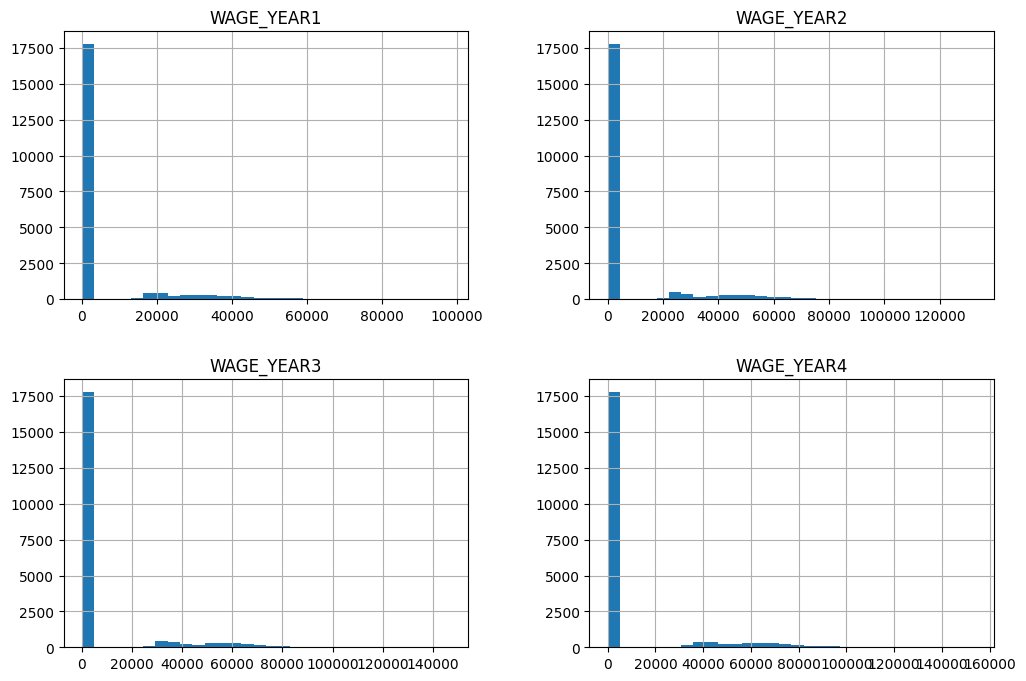

In [10]:
df[numeric_features].hist(figsize=(12, 8), bins=30)
plt.show()


=== VISUAL EVIDENCE OF RELATIONSHIPS ===



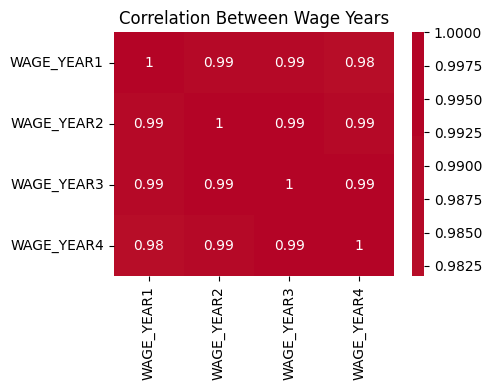

In [11]:
print("\n=== VISUAL EVIDENCE OF RELATIONSHIPS ===\n")

# Correlation heatmap for numeric features
import seaborn as sns

numeric_cols = ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Wage Years')
plt.tight_layout()
plt.savefig('wage_correlation_heatmap.png')
plt.show()

### The wage fields are highly correlated as seen above.!!!

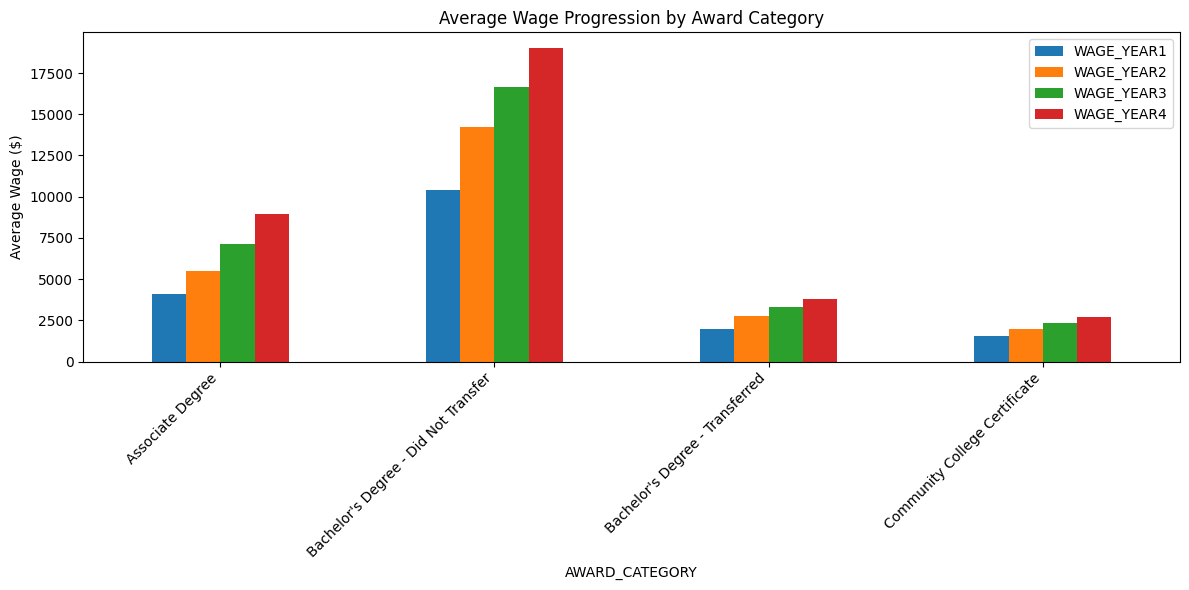

In [12]:
# Pairwise relationships between demographics and wages
# Show how different AWARD_CATEGORY affects wage progression
award_wage_comparison = df.groupby('AWARD_CATEGORY')[numeric_cols].mean()
award_wage_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Average Wage Progression by Award Category')
plt.ylabel('Average Wage ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('award_category_wages.png')
plt.show()

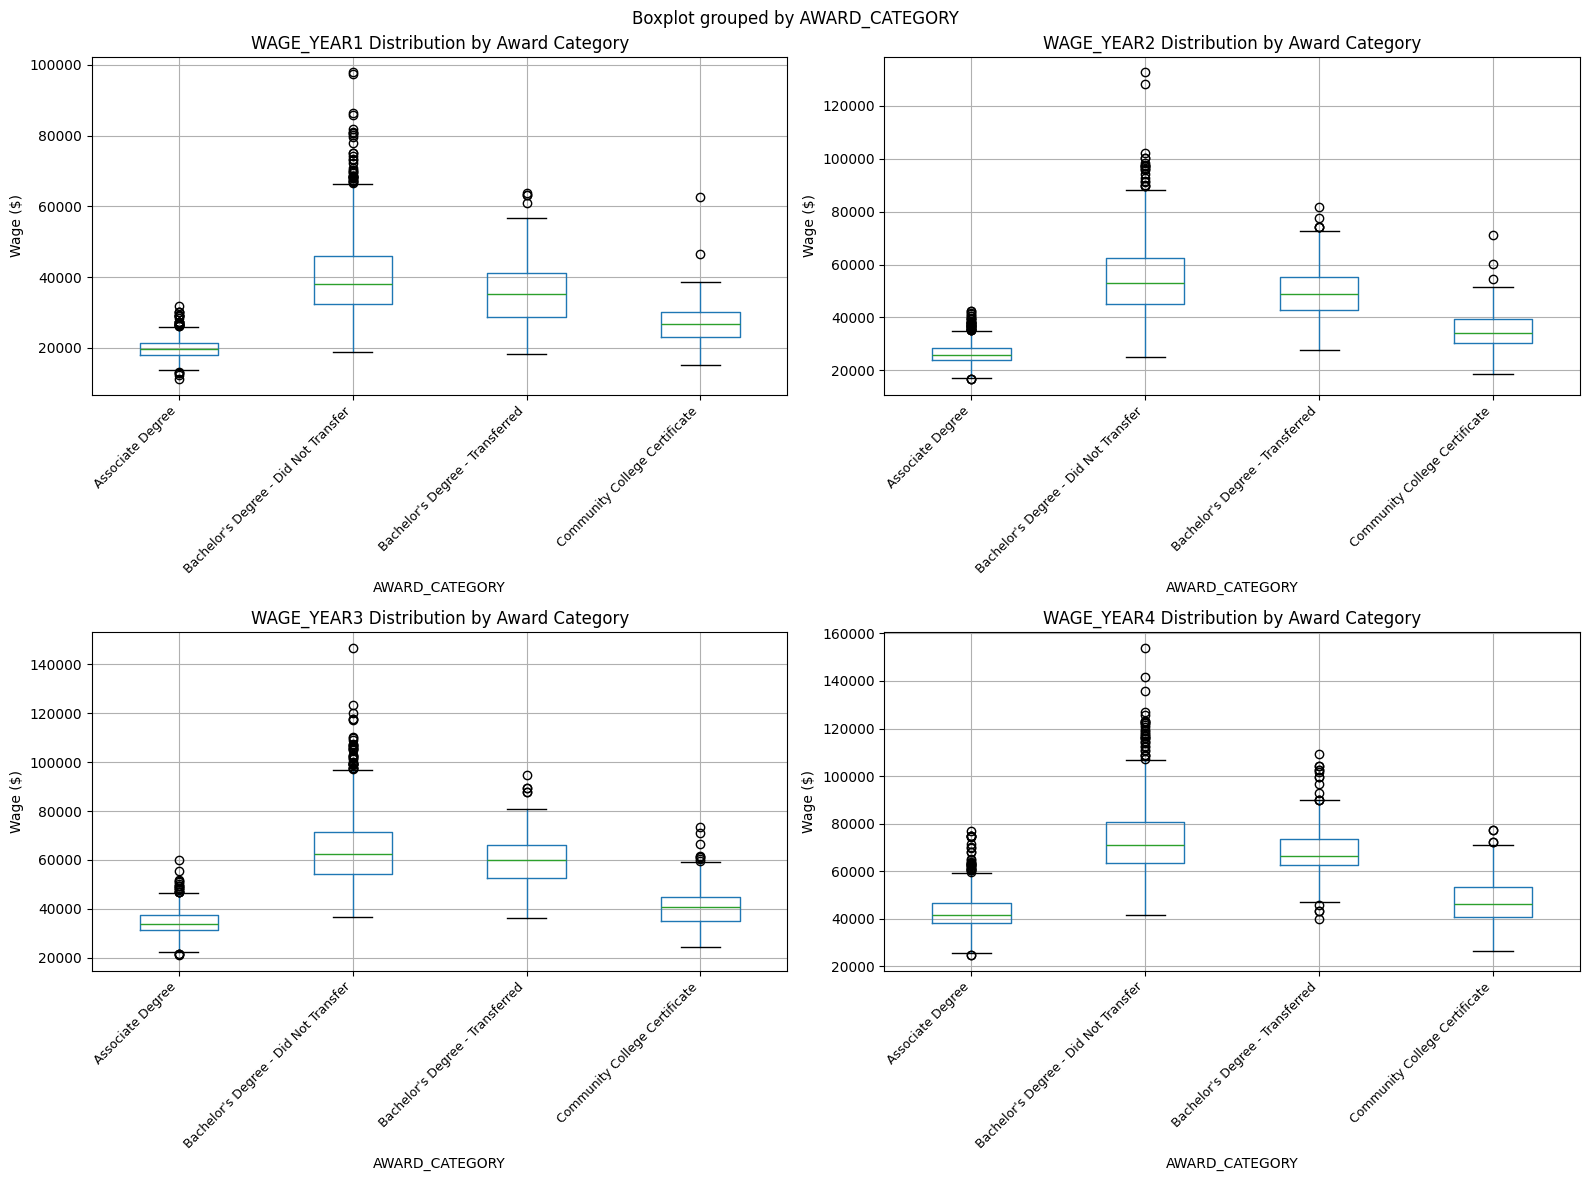

In [13]:
# Boxplots showing wage distribution by demographic category
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for idx, year in enumerate(['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4']):
    ax = axes[idx // 2, idx % 2]
    df[df[year] > 0].boxplot(column=year, by='AWARD_CATEGORY', ax=ax)
    ax.set_title(f'{year} Distribution by Award Category')
    ax.set_ylabel('Wage ($)')
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout()
plt.savefig('wage_distribution_boxplots.png')
plt.show()

In [14]:
# Filter out aggregated 'All' rows to get specific demographics
df_demographics = df[(df['DEMO_CATEGORY'] != 'All') & (df['STUDENT_POPULATION'] != 'All')]

# Group by demographic category and population, then get mean WAGE_YEAR3
wage_by_demo = df_demographics.groupby(['DEMO_CATEGORY', 'STUDENT_POPULATION'])['WAGE_YEAR3'].mean().sort_values(ascending=False)

# Or just get the extremes
print(f"\nHighest: {wage_by_demo.idxmax()} - ${wage_by_demo.max():,.2f}")
print(f"Lowest: {wage_by_demo.idxmin()} - ${wage_by_demo.min():,.2f}")


Highest: ('Foster Status', 'Not Foster Youth') - $20,893.02
Lowest: ('Race', 'None Reported') - $42.89


In [15]:
# Define negative wage trend (wages declining from Year 1 to Year 4)
df_wage_change = df.copy()
df_wage_change['wage_change'] = df_wage_change['WAGE_YEAR4'] - df_wage_change['WAGE_YEAR1']
negative_trend = df_wage_change[df_wage_change['wage_change'] < 0]

# Count how many have negative trends
print(f"Records with negative wage trends: {len(negative_trend)} out of {len(df_wage_change)} ({len(negative_trend)/len(df_wage_change)*100:.2f}%)")

Records with negative wage trends: 0 out of 20705 (0.00%)


In [16]:
# Calculate wage changes for each person
df_wage_change['wage_increase'] = df_wage_change['wage_change']
df_wage_change['pct_increase'] = ((df_wage_change['WAGE_YEAR4'] - df_wage_change['WAGE_YEAR1']) /
                                   df_wage_change['WAGE_YEAR1'].replace(0, np.nan) * 100)

# Filter for positive trends only
positive_trends = df_wage_change[df_wage_change['wage_change'] > 0].copy()

# Group by demographic combinations
demographic_wage_growth = positive_trends.groupby(['DEMO_CATEGORY', 'STUDENT_POPULATION']).agg({
    'wage_increase': ['count', 'mean'],
    'pct_increase': 'mean'
}).round(2)

# Show Top Demographics with Positive Wage Growth
print("Top Demographics with Positive Wage Growth:")
print(demographic_wage_growth.sort_values(('wage_increase', 'mean'), ascending=False))

Top Demographics with Positive Wage Growth:
                                                          wage_increase  \
                                                                  count   
DEMO_CATEGORY   STUDENT_POPULATION                                        
Race            Asian                                               174   
                Native Hawaiian or Other Pacific Islander             2   
Foster Status   Foster Youth                                          2   
Race            White                                               244   
                None Reported                                         2   
Gender          Male                                                411   
Homeless Status Did Not Experience Homelessness in K-12             236   
Race            Two or More Races                                     9   
Foster Status   Not Foster Youth                                    419   
All             All                                     

In [17]:
# Check what happened to those "missing" records
print("=== INVESTIGATING WAGE TRENDS ===\n")

df_wage_change = df.copy()
df_wage_change['wage_change'] = df_wage_change['WAGE_YEAR4'] - df_wage_change['WAGE_YEAR1']

# Count each category
negative = df_wage_change[df_wage_change['wage_change'] < 0]
zero = df_wage_change[df_wage_change['wage_change'] == 0]
positive = df_wage_change[df_wage_change['wage_change'] > 0]

print(f"Negative trends (Year4 < Year1): {len(negative)} ({len(negative)/len(df)*100:.2f}%)")
print(f"Zero change (Year4 = Year1):     {len(zero)} ({len(zero)/len(df)*100:.2f}%)")
print(f"Positive trends (Year4 > Year1): {len(positive)} ({len(positive)/len(df)*100:.2f}%)")
print(f"TOTAL:                            {len(negative) + len(zero) + len(positive)}")

# Check if those "zero change" records are actually people with no wages at all
zero_wage_both = zero[(zero['WAGE_YEAR1'] == 0) & (zero['WAGE_YEAR4'] == 0)]
zero_wage_same = zero[(zero['WAGE_YEAR1'] != 0) & (zero['WAGE_YEAR1'] == zero['WAGE_YEAR4'])]

print(f"\nBreakdown of 'zero change' records:")
print(f"  No wages recorded (Year1=0, Year4=0): {len(zero_wage_both)} ({len(zero_wage_both)/len(zero)*100:.2f}% of zero-change)")
print(f"  Same non-zero wage (Year1 = Year4):   {len(zero_wage_same)} ({len(zero_wage_same)/len(zero)*100:.2f}% of zero-change)")

# Check if Year2 and Year3 are also zero
all_zeros = zero_wage_both[
    (zero_wage_both['WAGE_YEAR2'] == 0) &
    (zero_wage_both['WAGE_YEAR3'] == 0)
]
print(f"\nRecords with ALL wage years = 0: {len(all_zeros)} ({len(all_zeros)/len(df)*100:.2f}% of total dataset)")

=== INVESTIGATING WAGE TRENDS ===

Negative trends (Year4 < Year1): 0 (0.00%)
Zero change (Year4 = Year1):     17770 (85.82%)
Positive trends (Year4 > Year1): 2935 (14.18%)
TOTAL:                            20705

Breakdown of 'zero change' records:
  No wages recorded (Year1=0, Year4=0): 17770 (100.00% of zero-change)
  Same non-zero wage (Year1 = Year4):   0 (0.00% of zero-change)

Records with ALL wage years = 0: 17770 (85.82% of total dataset)


### For Q) What does your model say about the people or populations whose data is provided?
(Code here, markdown in Part 3)

In [ ]:
# Adding statistical evidence from the data
print("\nObserved trends in the data:")

# Showing wage growth patterns by award category
avg_growth_by_award = df.groupby('AWARD_CATEGORY').apply(
    lambda x: (x['WAGE_YEAR4'].mean() - x['WAGE_YEAR1'].mean()) / x['WAGE_YEAR1'].mean() * 100,
    include_groups=False
)
print("\nAverage wage growth by Award Category:")
print(avg_growth_by_award.sort_values(ascending=False))

# Wage growth by demo
demo_wage_summary = df.groupby(['DEMO_CATEGORY', 'STUDENT_POPULATION'])[
    ['WAGE_YEAR1', 'WAGE_YEAR4']
].mean()
demo_wage_summary['growth'] = demo_wage_summary['WAGE_YEAR4'] - demo_wage_summary['WAGE_YEAR1']
print("\nWage growth by demographics (showing top 5):")
print(demo_wage_summary.sort_values('growth', ascending=False).head())


Observed trends in the data:

Average wage growth by Award Category:
AWARD_CATEGORY
Associate Degree                        116.411482
Bachelor's Degree - Transferred          93.716541
Bachelor's Degree - Did Not Transfer     82.777478
Community College Certificate            76.717655
dtype: float64

Wage growth by demographics (showing top 5):
                                                           WAGE_YEAR1  \
DEMO_CATEGORY   STUDENT_POPULATION                                      
All             All                                      16089.633495   
Foster Status   Not Foster Youth                         12889.096552   
Gender          Male                                     13090.127242   
                Female                                   10557.547321   
Homeless Status Did Not Experience Homelessness in K-12   9189.755981   

                                                           WAGE_YEAR4  \
DEMO_CATEGORY   STUDENT_POPULATION                               

# Part 2: Build a model

In [ ]:
df['ACADEMIC_YEAR'].value_counts()

,count
ACADEMIC_YEAR,
2018-2019,20705


Only one value for ACADEMIC_YEAR. We can drop it.

In [ ]:
df = df.drop('ACADEMIC_YEAR', axis=1)

In [ ]:
# How many unique codes does each district name have?
name_to_code = df.groupby('DISTRICT_NAME')['DISTRICT_CODE'].nunique()
print("Districts with multiple codes:")
print(name_to_code[name_to_code > 1])

# Check if any district has more than one code
if (name_to_code > 1).any():
    print("WARNING: Some districts have multiple codes!")
else:
    print("Each district name has only one code")

Districts with multiple codes:
Series([], Name: DISTRICT_CODE, dtype: int64)
Each district name has only one code


In [ ]:
df['DISTRICT_NAME'].nunique()

692

In [ ]:
df['DISTRICT_CODE'].nunique()

571

In [ ]:
code_to_name = df.groupby('DISTRICT_CODE')['DISTRICT_CODE'].nunique()
print("Districts with multiple codes:")
print(code_to_name[code_to_name > 1])

# Check if any district has more than one code
if (code_to_name > 1).any():
    print("WARNING: Some districts have multiple codes!")
else:
    print("Each district code has only one name")

Districts with multiple codes:
Series([], Name: DISTRICT_CODE, dtype: int64)
Each district code has only one name


In [ ]:
# 1. Count NaN values in DISTRICT_CODE
nan_count = df['DISTRICT_CODE'].isna().sum()
print(f"NaN values in DISTRICT_CODE: {nan_count}")
print(f"Percentage: {nan_count/len(df)*100:.2f}%")

# 2. Count categories in DISTRICT_TYPE
district_type_counts = df['DISTRICT_TYPE'].value_counts()
print("\nDISTRICT_TYPE counts:")
print(district_type_counts)

# 3. Check unique values for each DISTRICT_TYPE
print("\n--- Unique counts by DISTRICT_TYPE ---")
for dtype in df['DISTRICT_TYPE'].unique():
    subset = df[df['DISTRICT_TYPE'] == dtype]
    print(f"\n{dtype}:")
    print(f"  Unique DISTRICT_NAMEs: {subset['DISTRICT_NAME'].nunique()}")
    print(f"  Unique DISTRICT_CODEs: {subset['DISTRICT_CODE'].nunique()}")
    print(f"  NaN in DISTRICT_CODE: {subset['DISTRICT_CODE'].isna().sum()}")

# 4. Check which DISTRICT_TYPEs have NaN codes
print("\n--- NaN codes by DISTRICT_TYPE ---")
nan_by_type = df[df['DISTRICT_CODE'].isna()]['DISTRICT_TYPE'].value_counts()
print(nan_by_type)

NaN values in DISTRICT_CODE: 2745
Percentage: 13.26%

DISTRICT_TYPE counts:
DISTRICT_TYPE
School District         17960
Legislative District     2702
All                        43
Name: count, dtype: int64

--- Unique counts by DISTRICT_TYPE ---

School District:
  Unique DISTRICT_NAMEs: 571
  Unique DISTRICT_CODEs: 571
  NaN in DISTRICT_CODE: 0

Legislative District:
  Unique DISTRICT_NAMEs: 120
  Unique DISTRICT_CODEs: 0
  NaN in DISTRICT_CODE: 2702

All:
  Unique DISTRICT_NAMEs: 1
  Unique DISTRICT_CODEs: 0
  NaN in DISTRICT_CODE: 43

--- NaN codes by DISTRICT_TYPE ---
DISTRICT_TYPE
Legislative District    2702
All                       43
Name: count, dtype: int64


In [ ]:
# CART needs numeric input, so encode categoricals

categorical_features = ['DISTRICT_TYPE', 'DEMO_CATEGORY',
                        'STUDENT_POPULATION', 'AWARD_CATEGORY']

DISTRICT_CODE and DISTRICT_NAME have an almost one-one relationship. But, the number of categories are too many. This can result in overfitting in cart, and also isn't of much help in any other model either. Let's remove these.

In [ ]:
# Create a copy to avoid modifying original
df_cart = df.drop(columns=['DISTRICT_CODE', 'DISTRICT_NAME'])

for col in categorical_features:
    le = LabelEncoder()
    df_cart[col] = le.fit_transform(df_cart[col])

In [ ]:
# Define your features (X) and target (y)
numeric_features = ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3']  # No scaling needed for cart!
# Add encoded categorical features too

# Exclude WAGE_YEAR4 from features
feature_cols = [col for col in df_cart.columns if col != 'WAGE_YEAR4']
X = df_cart[feature_cols]
y = df_cart['WAGE_YEAR4']

In [ ]:
cart = DecisionTreeRegressor(random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Use CV on training set for model development
cv_scores = cross_val_score(cart, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"CV RMSE: {cv_rmse.mean():.2f}")

# Step 3: Train on training set, evaluate on validation set
cart.fit(X_train, y_train)
y_val_pred = cart.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {val_rmse:.2f}")

# Step 4: If CV and validation scores are similar → good sign!
# Now retrain on ALL 20,705 points
cart_final = DecisionTreeRegressor(random_state=42)
cart_final.fit(X, y)  # All labeled data

CV RMSE: 2787.78
Validation RMSE: 2778.48


DecisionTreeRegressor(random_state=42)

In [ ]:
# Calculate R² score (how much variance is explained)
# On validation set
val_r2 = r2_score(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

print(f"Validation R²: {val_r2:.3f}")  # Higher is better (max 1.0)
print(f"Validation MAE: ${val_mae:.2f}")
print(f"Validation RMSE: ${val_rmse:.2f}")

# Compare to baseline (predicting mean)
baseline_rmse = np.sqrt(mean_squared_error(y_val, [y_train.mean()] * len(y_val)))
print(f"\nBaseline RMSE (always predict mean): ${baseline_rmse:.2f}")
print(f"Improvement over baseline: {(1 - val_rmse/baseline_rmse)*100:.1f}%")

# Check distribution of errors
errors = y_val - y_val_pred
print(f"\nError distribution:")
print(f"Mean error: ${errors.mean():.2f}")
print(f"Median error: ${errors.median():.2f}")
print(f"Error std: ${errors.std():.2f}")

# What % of predictions are within $500? $1000?
within_500 = (np.abs(errors) <= 500).sum() / len(errors) * 100
within_1000 = (np.abs(errors) <= 1000).sum() / len(errors) * 100
print(f"\n{within_500:.1f}% of predictions within $500")
print(f"{within_1000:.1f}% of predictions within $1000")

Validation R²: 0.984
Validation MAE: $655.99
Validation RMSE: $2778.48

Baseline RMSE (always predict mean): $21940.32
Improvement over baseline: 87.3%

Error distribution:
Mean error: $-54.21
Median error: $0.00
Error std: $2778.29

89.7% of predictions within $500
90.4% of predictions within $1000


In [ ]:
# 1. Check tree depth (deep trees = potential overfitting)
print(f"Tree depth: {cart_final.tree_.max_depth}")
print(f"Number of leaves: {cart_final.tree_.n_leaves}")

# 2. Look at feature importance (is it using sensible features?)
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': cart_final.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 10 important features:")
print(feature_importance.head(10))

# 3. Check if there are duplicate rows (could explain perfect predictions)
print(f"\nDuplicate rows in training: {df_cart.duplicated().sum()}")
print(f"Unique feature combinations: {df_cart[feature_cols].drop_duplicates().shape[0]}")

# 4. Compare to a simpler model (limit tree depth)
cart_simple = DecisionTreeRegressor(max_depth=10, random_state=42)
cart_simple.fit(X_train, y_train)
y_val_pred_simple = cart_simple.predict(X_val)
val_rmse_simple = np.sqrt(mean_squared_error(y_val, y_val_pred_simple))
print(f"\nSimpler model (max_depth=10) RMSE: {val_rmse_simple:.2f}")

Tree depth: 38
Number of leaves: 2531

Top 10 important features:
              feature  importance
6          WAGE_YEAR3    0.992321
5          WAGE_YEAR2    0.003188
4          WAGE_YEAR1    0.003030
2  STUDENT_POPULATION    0.000488
3      AWARD_CATEGORY    0.000391
1       DEMO_CATEGORY    0.000310
0       DISTRICT_TYPE    0.000272

Duplicate rows in training: 17676
Unique feature combinations: 3029

Simpler model (max_depth=10) RMSE: 2322.31


Cart performs better with a depth of 10. 38 leads to overfitting.

RMSE of 2322 is good, but lets see if we can get something better

In [ ]:
# Start fresh from original data
df_lr = df.drop(columns=['DISTRICT_CODE', 'DISTRICT_NAME'])

# 1. Create pairwise feature (combine DEMO_CATEGORY and STUDENT_POPULATION)
df_lr['DEMO_POPULATION'] = df_lr['DEMO_CATEGORY'] + '_' + df_lr['STUDENT_POPULATION']

# Example: 'Race' + 'Asian' = 'Race_Asian'
#          'Gender' + 'Female' = 'Gender_Female'

# 2. One-hot encode the specified features
features_to_encode = ['DISTRICT_TYPE', 'AWARD_CATEGORY', 'DEMO_POPULATION']

df_lr = pd.get_dummies(df_lr, columns=features_to_encode, drop_first=True)

# drop_first=True avoids multicollinearity (important for Linear Regression!)

# 3. Drop original DEMO_CATEGORY and STUDENT_POPULATION (already combined)
df_lr = df_lr.drop(columns=['DEMO_CATEGORY', 'STUDENT_POPULATION'])

# 4. Prepare features and target
X = df_lr.drop(columns=['WAGE_YEAR4'])
y = df_lr['WAGE_YEAR4']

print(f"Original features: {len(df_lr.columns)}")
print(f"After one-hot encoding: {X.shape[1]} features")
print(f"\nFeature names:\n{list(X.columns)}")

Original features: 23
After one-hot encoding: 22 features

Feature names:
['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'DISTRICT_TYPE_Legislative District', 'DISTRICT_TYPE_School District', "AWARD_CATEGORY_Bachelor's Degree - Did Not Transfer", "AWARD_CATEGORY_Bachelor's Degree - Transferred", 'AWARD_CATEGORY_Community College Certificate', 'DEMO_POPULATION_Foster Status_Foster Youth', 'DEMO_POPULATION_Foster Status_Not Foster Youth', 'DEMO_POPULATION_Gender_Female', 'DEMO_POPULATION_Gender_Male', 'DEMO_POPULATION_Homeless Status_Did Not Experience Homelessness in K-12', 'DEMO_POPULATION_Homeless Status_Experienced Homelessness in K-12', 'DEMO_POPULATION_Race_American Indian or Alaska Native', 'DEMO_POPULATION_Race_Asian', 'DEMO_POPULATION_Race_Black or African American', 'DEMO_POPULATION_Race_Hispanic or Latino', 'DEMO_POPULATION_Race_Native Hawaiian or Other Pacific Islander', 'DEMO_POPULATION_Race_None Reported', 'DEMO_POPULATION_Race_Two or More Races', 'DEMO_POPULATION_Race_White']


In [ ]:
# Step 1: Hold out validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Normalize numeric features on training data
scaler = StandardScaler()
numeric_features = ['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3']

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val_scaled[numeric_features] = scaler.transform(X_val[numeric_features])

# Step 3: Cross-validation on training set
lr = LinearRegression()
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE: {cv_rmse.mean():.2f} (+/- {cv_rmse.std():.2f})")
print(f"Individual fold RMSEs: {cv_rmse}")

# Step 4: Train on full training set, evaluate on validation set
lr.fit(X_train_scaled, y_train)
y_val_pred = lr.predict(X_val_scaled)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

print(f"\nValidation Set Results:")
print(f"Validation RMSE: ${val_rmse:.2f}")
print(f"Validation MAE: ${val_mae:.2f}")
print(f"Validation R²: {val_r2:.4f}")

# Step 5: Compare CV and validation - should be similar!
print(f"\nConsistency Check:")
print(f"CV RMSE:         ${cv_rmse.mean():.2f}")
print(f"Validation RMSE: ${val_rmse:.2f}")
print(f"Difference:      ${abs(cv_rmse.mean() - val_rmse):.2f}")

# Step 6: If scores are good and similar, retrain on ALL data
print("\n" + "="*50)
print("Training final model on ALL data...")
print("="*50)

# Normalize all data
scaler_final = StandardScaler()
X_scaled_all = X.copy()
X_scaled_all[numeric_features] = scaler_final.fit_transform(X[numeric_features])

# Train final model
lr_final = LinearRegression()
lr_final.fit(X_scaled_all, y)

print("Final model trained on all 20,705 samples")
print("Ready to predict on test set")

# Comparison with CART
print(f"\n" + "="*50)
print("Model Comparison:")
print("="*50)
print(f"CART (max_depth=10):  RMSE = $2322.31")
print(f"Linear Regression:    RMSE = ${val_rmse:.2f}")
improvement = 2322.31 - val_rmse
print(f"Improvement:          ${improvement:.2f} ({improvement/2322.31*100:.1f}%)")
val_rmse_lr = val_rmse

Cross-Validation RMSE: 2433.10 (+/- 125.93)
Individual fold RMSEs: [2383.43898258 2652.20178453 2274.30715134 2385.68731646 2469.85671591]

Validation Set Results:
Validation RMSE: $2449.08
Validation MAE: $919.99
Validation R²: 0.9875

Consistency Check:
CV RMSE:         $2433.10
Validation RMSE: $2449.08
Difference:      $15.98

Training final model on ALL data...
Final model trained on all 20,705 samples
Ready to predict on test set

Model Comparison:
CART (max_depth=10):  RMSE = $2322.31
Linear Regression:    RMSE = $2449.08
Improvement:          $-126.77 (-5.5%)


In [ ]:
# Use the same one-hot encoded data (X, y from before)
# X already has one-hot encoding for DISTRICT_TYPE, AWARD_CATEGORY, DEMO_POPULATION

# Step 1: Hold out validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Normalize ALL features (important for KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 3: Cross-validation on training set
# Try different k values
k_values = [3, 5, 7, 10, 15, 20]
print("Testing different k values with Cross-Validation:")
print("="*60)

best_k = None
best_cv_rmse = float('inf')

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)  # n_jobs=-1 for parallel processing
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    print(f"k={k:2d}  CV RMSE: ${cv_rmse.mean():7.2f} (+/- ${cv_rmse.std():.2f})")

    if cv_rmse.mean() < best_cv_rmse:
        best_cv_rmse = cv_rmse.mean()
        best_k = k

print(f"\nBest k: {best_k} with CV RMSE: ${best_cv_rmse:.2f}")

# Step 4: Train best model on full training set, evaluate on validation
knn_best = KNeighborsRegressor(n_neighbors=best_k, n_jobs=-1)
knn_best.fit(X_train_scaled, y_train)
y_val_pred = knn_best.predict(X_val_scaled)

val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

print(f"\nValidation Set Results (k={best_k}):")
print(f"Validation RMSE: ${val_rmse:.2f}")
print(f"Validation MAE:  ${val_mae:.2f}")
print(f"Validation R²:   {val_r2:.4f}")

# Step 5: Consistency check
print(f"\nConsistency Check:")
print(f"CV RMSE:         ${best_cv_rmse:.2f}")
print(f"Validation RMSE: ${val_rmse:.2f}")
print(f"Difference:      ${abs(best_cv_rmse - val_rmse):.2f}")

# Step 6: Train final model on ALL data
print("\n" + "="*60)
print("Training final model on ALL data...")
print("="*60)

scaler_final = StandardScaler()
X_scaled_all = scaler_final.fit_transform(X)

knn_final = KNeighborsRegressor(n_neighbors=best_k, n_jobs=-1)
knn_final.fit(X_scaled_all, y)

print(f"Final KNN model (k={best_k}) trained on all 20,705 samples")
print("Ready to predict on test set")

# Step 7: Model Comparison
print(f"\n" + "="*60)
print("Model Comparison:")
print("="*60)
print(f"CART (max_depth=10):  RMSE = $2322.31")
print(f"Linear Regression:    RMSE = ${val_rmse_lr:.2f}")  # From previous run
print(f"KNN (k={best_k}):          RMSE = ${val_rmse:.2f}")

if val_rmse < 2322.31:
    improvement = 2322.31 - val_rmse
    print(f"\nKNN improves over CART by ${improvement:.2f} ({improvement/2322.31*100:.1f}%)")
else:
    print(f"\nKNN is worse than CART by ${val_rmse - 2322.31:.2f}")

Testing different k values with Cross-Validation:
k= 3  CV RMSE: $2802.62 (+/- $218.88)
k= 5  CV RMSE: $2771.16 (+/- $212.57)
k= 7  CV RMSE: $2818.06 (+/- $225.34)
k=10  CV RMSE: $2938.94 (+/- $259.60)
k=15  CV RMSE: $3117.97 (+/- $313.77)
k=20  CV RMSE: $3233.26 (+/- $381.93)

Best k: 5 with CV RMSE: $2771.16

Validation Set Results (k=5):
Validation RMSE: $2729.28
Validation MAE:  $693.55
Validation R²:   0.9845

Consistency Check:
CV RMSE:         $2771.16
Validation RMSE: $2729.28
Difference:      $41.89

Training final model on ALL data...
Final KNN model (k=5) trained on all 20,705 samples
Ready to predict on test set

Model Comparison:
CART (max_depth=10):  RMSE = $2322.31
Linear Regression:    RMSE = $2449.08
KNN (k=5):          RMSE = $2729.28

KNN is worse than CART by $406.97


## Observation:
None of these are as good as we want. We can try another approach - Since we observed earlier in the heapmap that wage features are highly correlated, lets drop other features and try how good our model performs with only wage features.

In [ ]:
# ========================================
# USE ONLY WAGE FEATURES
# ========================================

X = df[['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3']]
y = df['WAGE_YEAR4']

print(f"Features: {X.shape[1]} (only wage history)")
print(f"Samples: {len(X)}")

# ========================================
# TRAIN-TEST SPLIT
# ========================================

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ========================================
# MODEL 1: LINEAR REGRESSION
# ========================================

print("\n" + "="*70)
print("MODEL 1: LINEAR REGRESSION")
print("="*70)

lr = LinearRegression()

# Cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"CV RMSE: ${cv_rmse.mean():.2f} (+/- ${cv_rmse.std():.2f})")

# Train and validate
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)
val_rmse_lr = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
val_r2_lr = r2_score(y_val, y_val_pred_lr)

print(f"Validation RMSE: ${val_rmse_lr:.2f}")
print(f"Validation R²: {val_r2_lr:.4f}")

# Show coefficients
print(f"\nCoefficients:")
print(f"  WAGE_YEAR1: {lr.coef_[0]:.4f}")
print(f"  WAGE_YEAR2: {lr.coef_[1]:.4f}")
print(f"  WAGE_YEAR3: {lr.coef_[2]:.4f}")
print(f"  Intercept: {lr.intercept_:.2f}")

# ========================================
# MODEL 2: CART
# ========================================

print("\n" + "="*70)
print("MODEL 2: CART")
print("="*70)

# Try different max_depths
best_cart_rmse = float('inf')
best_depth = None

for depth in [5, 10, 15, 20, None]:
    cart = DecisionTreeRegressor(max_depth=depth, random_state=42)
    cv_scores = cross_val_score(cart, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_mean = np.sqrt(-cv_scores).mean()

    if cv_rmse_mean < best_cart_rmse:
        best_cart_rmse = cv_rmse_mean
        best_depth = depth

print(f"Best max_depth: {best_depth} (CV RMSE: ${best_cart_rmse:.2f})")

# Train best CART
cart_best = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
cv_scores = cross_val_score(cart_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"CV RMSE: ${cv_rmse.mean():.2f} (+/- ${cv_rmse.std():.2f})")

cart_best.fit(X_train, y_train)
y_val_pred_cart = cart_best.predict(X_val)
val_rmse_cart = np.sqrt(mean_squared_error(y_val, y_val_pred_cart))
val_r2_cart = r2_score(y_val, y_val_pred_cart)

print(f"Validation RMSE: ${val_rmse_cart:.2f}")
print(f"Validation R²: {val_r2_cart:.4f}")

# Feature importance
print(f"\nFeature Importance:")
for feat, imp in zip(['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3'], cart_best.feature_importances_):
    print(f"  {feat}: {imp:.4f}")

# ========================================
# MODEL 3: KNN (WITH SCALING)
# ========================================

print("\n" + "="*70)
print("MODEL 3: KNN (with normalization)")
print("="*70)

# Normalize for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Try different k values
best_k = None
best_knn_rmse = float('inf')

for k in [3, 5, 7, 10, 15, 20]:
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_mean = np.sqrt(-cv_scores).mean()

    if cv_rmse_mean < best_knn_rmse:
        best_knn_rmse = cv_rmse_mean
        best_k = k

print(f"Best k: {best_k} (CV RMSE: ${best_knn_rmse:.2f})")

# Train best KNN
knn_best = KNeighborsRegressor(n_neighbors=best_k)
cv_scores = cross_val_score(knn_best, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"CV RMSE: ${cv_rmse.mean():.2f} (+/- ${cv_rmse.std():.2f})")

knn_best.fit(X_train_scaled, y_train)
y_val_pred_knn = knn_best.predict(X_val_scaled)
val_rmse_knn = np.sqrt(mean_squared_error(y_val, y_val_pred_knn))
val_r2_knn = r2_score(y_val, y_val_pred_knn)

print(f"Validation RMSE: ${val_rmse_knn:.2f}")
print(f"Validation R²: {val_r2_knn:.4f}")

# ========================================
# FINAL COMPARISON
# ========================================

print("\n" + "="*70)
print("FINAL COMPARISON")
print("="*70)

results = [
    ('Linear Regression', val_rmse_lr, val_r2_lr),
    (f'CART (depth={best_depth})', val_rmse_cart, val_r2_cart),
    (f'KNN (k={best_k})', val_rmse_knn, val_r2_knn)
]

for name, rmse, r2 in sorted(results, key=lambda x: x[1]):
    status = "yes" if rmse < 2200 else "no"
    print(f"{status} {name:25s}  RMSE: ${rmse:7.2f}  R²: {r2:.4f}")

# Find best model
best_model_info = min(results, key=lambda x: x[1])
print(f"\nWINNER: {best_model_info[0]} with RMSE ${best_model_info[1]:.2f}")

# ========================================
# TRAIN FINAL MODEL ON ALL DATA
# ========================================

print("\n" + "="*70)
print("TRAINING FINAL MODEL ON ALL DATA")
print("="*70)

if best_model_info[0] == 'Linear Regression':
    final_model = LinearRegression()
    final_model.fit(X, y)
    print(f"Linear Regression trained on all {len(X)} samples")
elif 'CART' in best_model_info[0]:
    final_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
    final_model.fit(X, y)
    print(f"CART (depth={best_depth}) trained on all {len(X)} samples")
else:
    scaler_final = StandardScaler()
    X_scaled_all = scaler_final.fit_transform(X)
    final_model = KNeighborsRegressor(n_neighbors=best_k)
    final_model.fit(X_scaled_all, y)
    print(f"KNN (k={best_k}) trained on all {len(X)} samples")

print("Ready for test set predictions")

Features: 3 (only wage history)
Samples: 20705

MODEL 1: LINEAR REGRESSION
CV RMSE: $2471.37 (+/- $129.22)
Validation RMSE: $2500.54
Validation R²: 0.9870

Coefficients:
  WAGE_YEAR1: 0.0764
  WAGE_YEAR2: 0.0591
  WAGE_YEAR3: 1.0493
  Intercept: 147.76

MODEL 2: CART
Best max_depth: 5 (CV RMSE: $2329.02)
CV RMSE: $2329.02 (+/- $89.41)
Validation RMSE: $2264.55
Validation R²: 0.9893

Feature Importance:
  WAGE_YEAR1: 0.0002
  WAGE_YEAR2: 0.0001
  WAGE_YEAR3: 0.9997

MODEL 3: KNN (with normalization)
Best k: 15 (CV RMSE: $2284.03)
CV RMSE: $2284.03 (+/- $111.95)
Validation RMSE: $2143.32
Validation R²: 0.9905

FINAL COMPARISON
yes KNN (k=15)                 RMSE: $2143.32  R²: 0.9905
no CART (depth=5)             RMSE: $2264.55  R²: 0.9893
no Linear Regression          RMSE: $2500.54  R²: 0.9870

WINNER: KNN (k=15) with RMSE $2143.32

TRAINING FINAL MODEL ON ALL DATA
KNN (k=15) trained on all 20705 samples
Ready for test set predictions


## Observation
This is quite good. Let's use this to predict on the test set.

In [ ]:
df_test = pd.read_csv('earnings_test_features.csv')
df_test

,DISTRICT_TYPE,DISTRICT_NAME,DISTRICT_CODE,ACADEMIC_YEAR,DEMO_CATEGORY,STUDENT_POPULATION,AWARD_CATEGORY,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3
0,School District,SBE - Academia Avance Charter,1976968.0,2018-2019,Race,White,Bachelor's Degree - Transferred,0.0,0.0,0.0
1,Legislative District,Assembly District 38,NaN,2018-2019,Homeless Status,Experienced Homelessness in K-12,Associate Degree,22640.0,32741.0,36982.0
2,School District,Santa Clara County Office of Education,4310439.0,2018-2019,Foster Status,Foster Youth,Community College Certificate,0.0,0.0,0.0
3,Legislative District,Senate District 40,NaN,2018-2019,Homeless Status,Experienced Homelessness in K-12,Bachelor's Degree - Transferred,0.0,0.0,0.0
4,School District,Central Union High,1363115.0,2018-2019,Foster Status,Not Foster Youth,Associate Degree,16237.0,21844.0,32594.0
...,...,...,...,...,...,...,...,...,...,...
6897,School District,Santa Clara County Office of Education,4310439.0,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0
6898,School District,Butte Valley Unified,4773684.0,2018-2019,Foster Status,Foster Youth,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0
6899,All,All,NaN,2018-2019,Race,Black or African American,Associate Degree,19369.0,26101.0,31282.0
6900,School District,Fort Sage Unified,1875036.0,2018-2019,Homeless Status,Experienced Homelessness in K-12,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0


In [ ]:
# ========================================
# PREDICT ON TEST SET
# ========================================

print("\n" + "="*70)
print("MAKING PREDICTIONS ON TEST SET")
print("="*70)

# Extract only wage features from test data (same as training)
X_test = df_test[['WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3']]

print(f"Test samples: {len(X_test)}")

# Scale test data using the SAME scaler fit on training data
X_test_scaled = scaler_final.transform(X_test)

# Make predictions
predictions = final_model.predict(X_test_scaled)

print(f"Predictions generated: {len(predictions)}")
print(f"Sample predictions: {predictions[:5]}")

# ========================================
# CREATE SUBMISSION FILE
# ========================================

# Create submission dataframe
submission = pd.DataFrame(predictions)

# Save to CSV
submission.to_csv('preds.csv', index=False, header=False)

# Download the file
files.download('preds.csv')


MAKING PREDICTIONS ON TEST SET
Test samples: 6902
Predictions generated: 6902
Sample predictions: [    0.         43556.8            0.             0.
 39026.66666667]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Part 3

### Which features best predict the target outcome (WAGE_YEAR4)?

- Wage fields (especially wage year 3) best predicts the target outcome. (as seen from cell 30 and later)
### What does your model say about the people or populations whose data is provided?

- The model reveals:

  - **Wage Momentum Effect**: Prior wages (especially Year 3) are by far the strongest predictor (99.23% importance) as seen from the heatmap in cell 11 and also Decision Tree results in cell 30. This suggests that people who start with higher wages maintain or grow that advantage - a "rich get richer" pattern.

  - **Award Type Matters**: From our visualizations, we see that Associate Degree shows highest average wage growth in the first 3-4 years.

  - **Wage growth by demographics**: All/General category has highest wage growth.

### What features, if any, would you like to have had to make a better model?

- We dont need any other features.